In [163]:
import pandas as pd
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller, arma_order_select_ic
import statsmodels.api as sm
import numpy as np
import random
#from fbprophet import Prophet
import quandl
from pylab import rcParams
rcParams['figure.figsize'] = 15, 20
from matplotlib import pyplot
from pandas import Series
from math import sqrt 
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

In [67]:
icici = quandl.get('NSE/ICICIBANK.5',start_date='2017-01-01',end_date='2017-12-26')
icici=icici['Close']

In [152]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = pyplot.plot(timeseries, color='blue',label='Original')
    mean = pyplot.plot(rolmean, color='red', label='Rolling Mean')
    std = pyplot.plot(rolstd, color='black', label = 'Rolling Std')
    pyplot.legend(loc='best')
    pyplot.title('Rolling Mean & Standard Deviation')
    pyplot.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


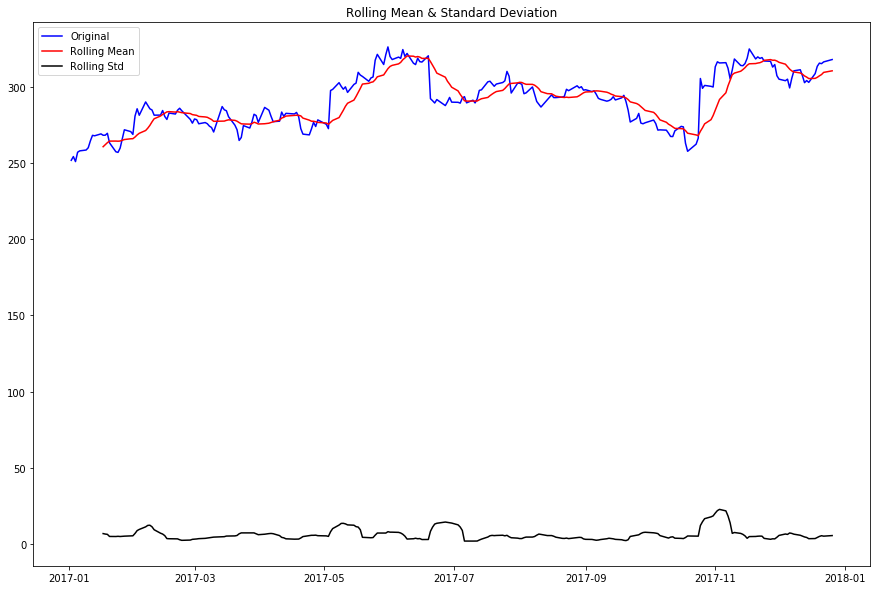

Results of Dickey-Fuller Test:
Test Statistic                  -2.681894
p-value                          0.077224
#Lags Used                       0.000000
Number of Observations Used    244.000000
Critical Value (1%)             -3.457438
Critical Value (5%)             -2.873459
Critical Value (10%)            -2.573122
dtype: float64


In [153]:
test_stationarity(icici)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until


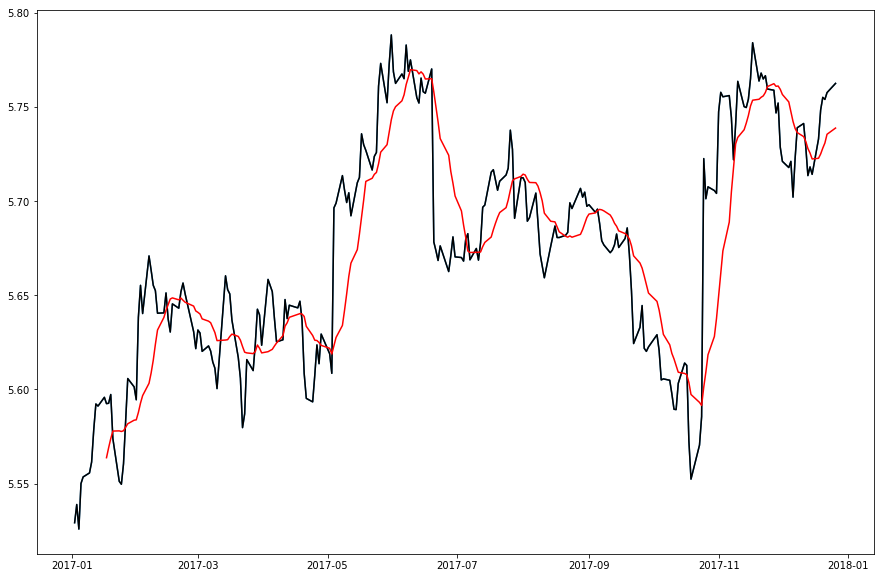

In [69]:
ts_log = np.log(icici)
pyplot.plot(ts_log)
moving_avg = pd.rolling_mean(ts_log,12)
pyplot.plot(ts_log, color='black')
pyplot.plot(moving_avg, color='red')
pyplot.show()

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  


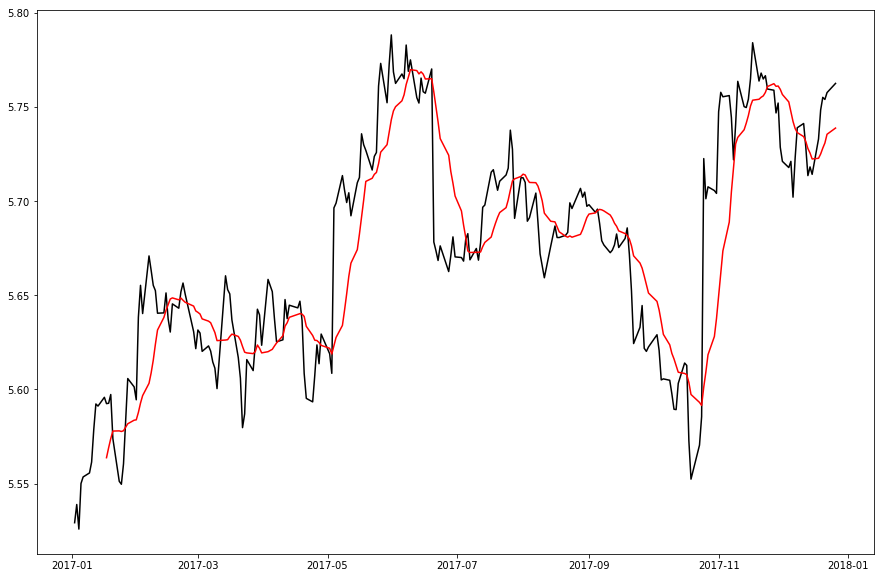

In [154]:
ts_log = np.log(icici)
moving_avg = pd.rolling_mean(ts_log,12)
pyplot.plot(ts_log, color='black')
pyplot.plot(moving_avg, color='red')
pyplot.show()

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


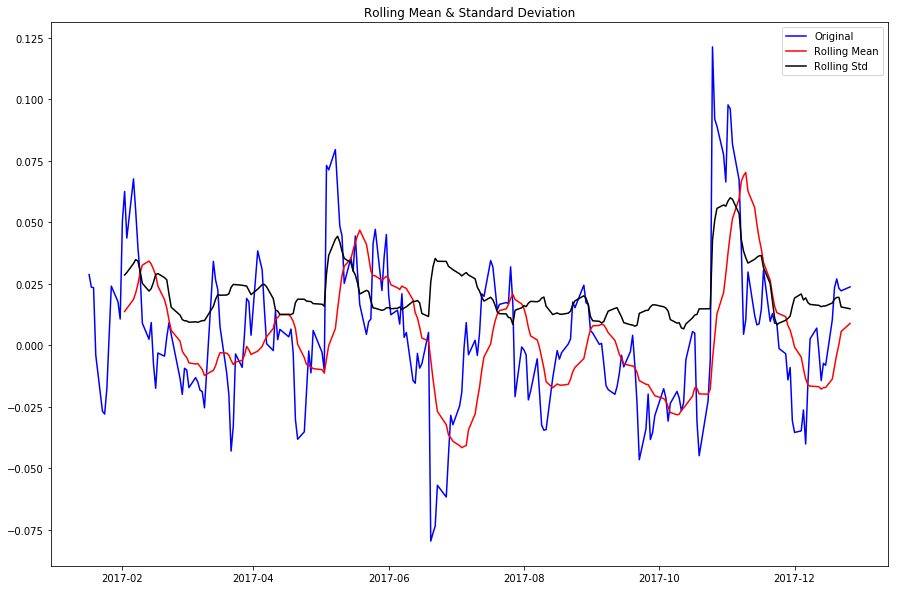

Results of Dickey-Fuller Test:
Test Statistic                  -4.624885
p-value                          0.000116
#Lags Used                       0.000000
Number of Observations Used    233.000000
Critical Value (1%)             -3.458731
Critical Value (5%)             -2.874026
Critical Value (10%)            -2.573424
dtype: float64


In [78]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(halflife=12,min_periods=0,adjust=True,ignore_na=False).mean()
  """Entry point for launching an IPython kernel.


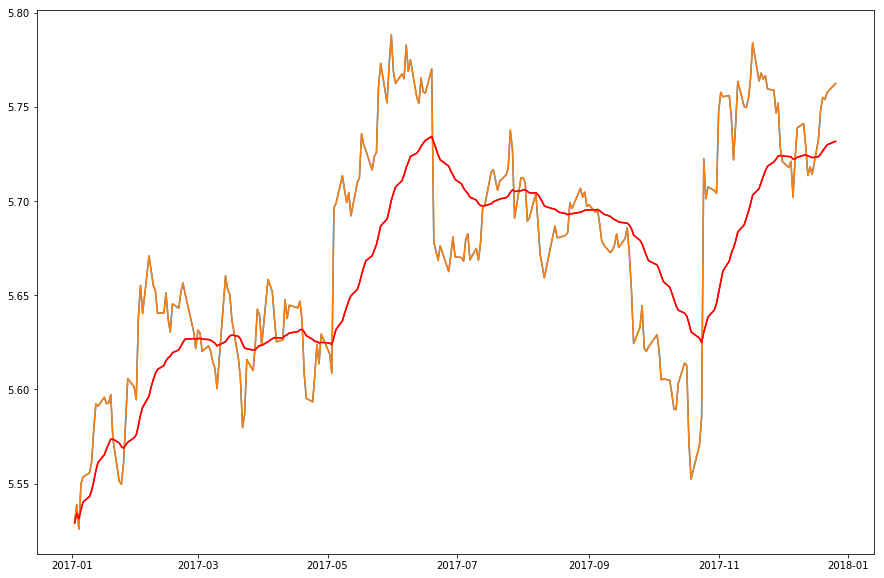

In [81]:
expwighted_avg = pd.ewma(ts_log, halflife=12)
pyplot.plot(ts_log)
pyplot.plot(expwighted_avg, color='red')
pyplot.show()

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


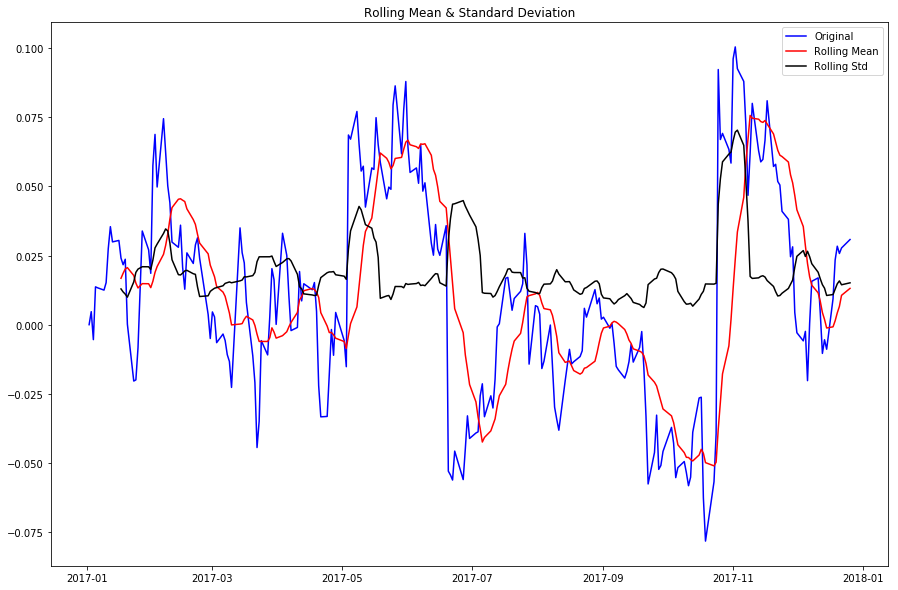

Results of Dickey-Fuller Test:
Test Statistic                  -3.694250
p-value                          0.004195
#Lags Used                       0.000000
Number of Observations Used    244.000000
Critical Value (1%)             -3.457438
Critical Value (5%)             -2.873459
Critical Value (10%)            -2.573122
dtype: float64


In [82]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


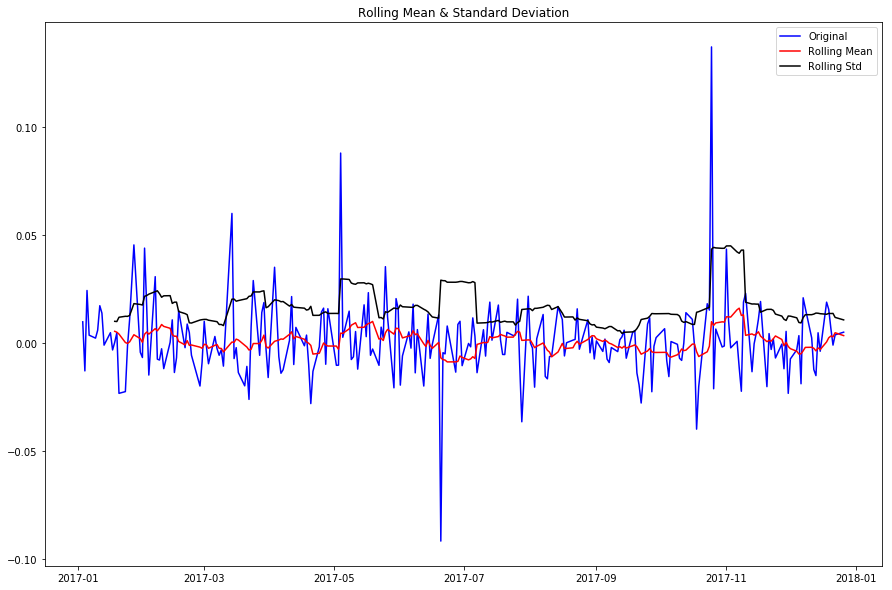

Results of Dickey-Fuller Test:
Test Statistic                -1.604640e+01
p-value                        5.838476e-29
#Lags Used                     0.000000e+00
Number of Observations Used    2.430000e+02
Critical Value (1%)           -3.457551e+00
Critical Value (5%)           -2.873509e+00
Critical Value (10%)          -2.573148e+00
dtype: float64


In [93]:
ts_log_diff = ts_log - ts_log.shift()
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

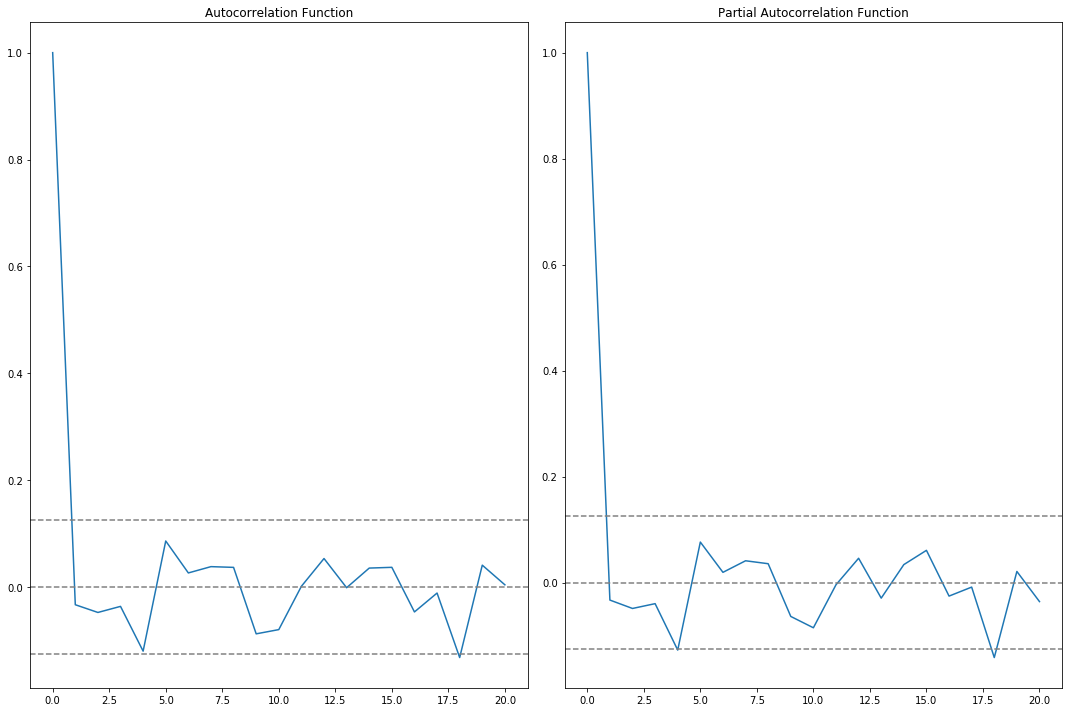

In [94]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20)
#Plot ACF: 
pyplot.subplot(121) 
pyplot.plot(lag_acf)
pyplot.axhline(y=0,linestyle='--',color='gray')
pyplot.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
pyplot.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
pyplot.title('Autocorrelation Function')
#Plot PACF:
pyplot.subplot(122)
pyplot.plot(lag_pacf)
pyplot.axhline(y=0,linestyle='--',color='gray')
pyplot.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
pyplot.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
pyplot.title('Partial Autocorrelation Function')
pyplot.tight_layout()
pyplot.show()

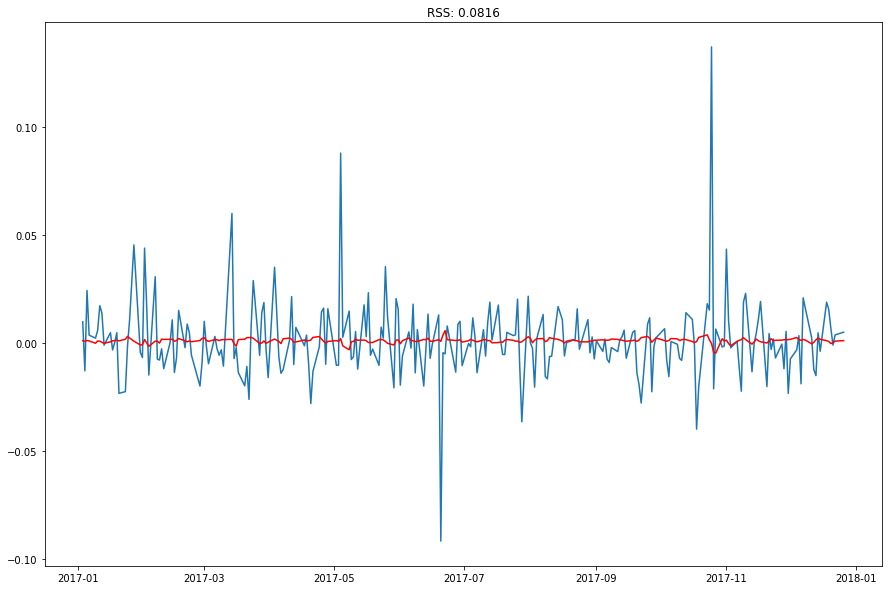

In [104]:
model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
pyplot.plot(ts_log_diff)
pyplot.plot(results_AR.fittedvalues, color='red')
pyplot.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))
pyplot.show()

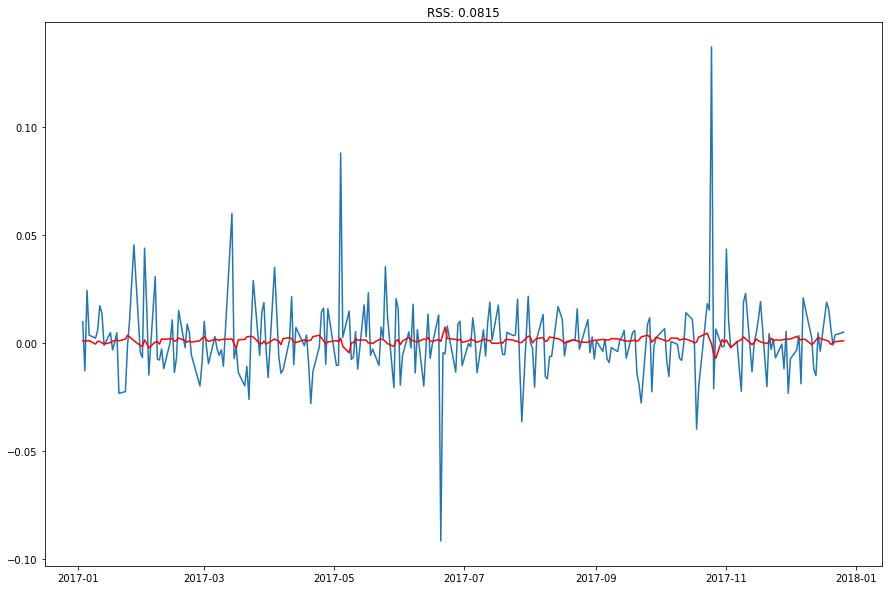

In [98]:
model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
pyplot.plot(ts_log_diff)
pyplot.plot(results_MA.fittedvalues, color='red')
pyplot.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))
pyplot.show()

In [143]:
wmodel = ARIMA(ts_log, order=(2, 1, 1))  
results_ARIMA = wmodel.fit(disp=0)  

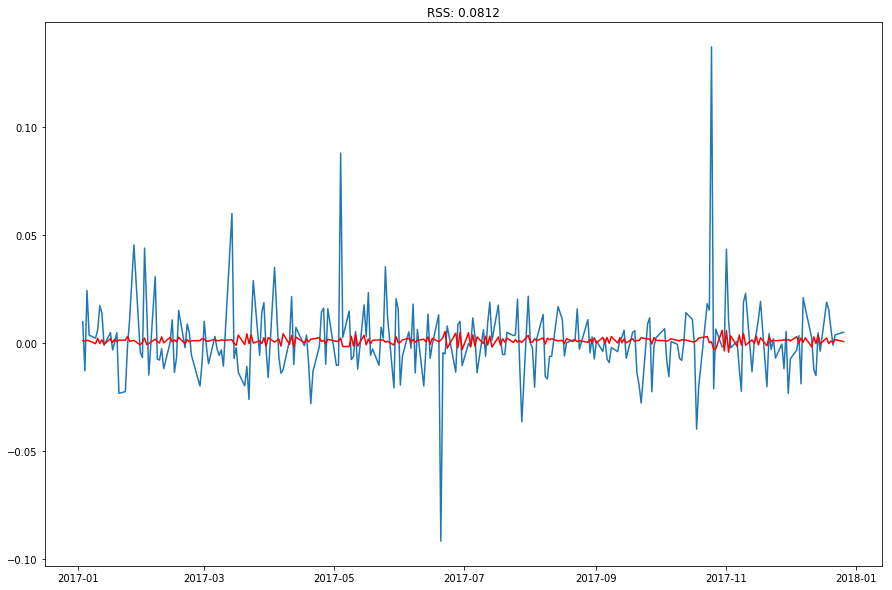

In [144]:
pyplot.plot(ts_log_diff)
pyplot.plot(results_ARIMA.fittedvalues, color='red')
pyplot.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))
pyplot.show()

In [155]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues)
print(predictions_ARIMA_diff)

Date
2017-01-03    0.000956
2017-01-04    0.000674
2017-01-05    0.001157
2017-01-06    0.000861
2017-01-09   -0.000438
2017-01-10    0.002063
2017-01-11   -0.000294
2017-01-12    0.001344
2017-01-13   -0.000759
2017-01-16    0.001847
2017-01-17    0.000142
2017-01-18    0.001615
2017-01-19    0.000621
2017-01-20    0.001210
2017-01-23    0.001177
2017-01-24    0.002876
2017-01-25    0.000654
2017-01-27    0.001116
2017-01-30   -0.001007
2017-01-31    0.000262
2017-02-01    0.002140
2017-02-02   -0.000847
2017-02-03   -0.000378
2017-02-06    0.001670
2017-02-07    0.000447
2017-02-08   -0.000126
2017-02-09    0.002724
2017-02-10   -0.000056
2017-02-13    0.002476
2017-02-14    0.000335
                ...   
2017-11-14   -0.000327
2017-11-15    0.003060
2017-11-16   -0.001020
2017-11-17    0.002328
2017-11-20   -0.001410
2017-11-21    0.002643
2017-11-22    0.000575
2017-11-23    0.001223
2017-11-24    0.000931
2017-11-27    0.001146
2017-11-28    0.001303
2017-11-29    0.001073
2017-1

In [156]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum)

Date
2017-01-03    0.000956
2017-01-04    0.001630
2017-01-05    0.002786
2017-01-06    0.003647
2017-01-09    0.003209
2017-01-10    0.005273
2017-01-11    0.004979
2017-01-12    0.006322
2017-01-13    0.005563
2017-01-16    0.007411
2017-01-17    0.007553
2017-01-18    0.009167
2017-01-19    0.009789
2017-01-20    0.010999
2017-01-23    0.012176
2017-01-24    0.015052
2017-01-25    0.015706
2017-01-27    0.016822
2017-01-30    0.015816
2017-01-31    0.016078
2017-02-01    0.018218
2017-02-02    0.017372
2017-02-03    0.016994
2017-02-06    0.018664
2017-02-07    0.019111
2017-02-08    0.018985
2017-02-09    0.021709
2017-02-10    0.021653
2017-02-13    0.024130
2017-02-14    0.024465
                ...   
2017-11-14    0.203515
2017-11-15    0.206575
2017-11-16    0.205555
2017-11-17    0.207883
2017-11-20    0.206473
2017-11-21    0.209116
2017-11-22    0.209690
2017-11-23    0.210914
2017-11-24    0.211845
2017-11-27    0.212991
2017-11-28    0.214294
2017-11-29    0.215368
2017-1

In [159]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum)

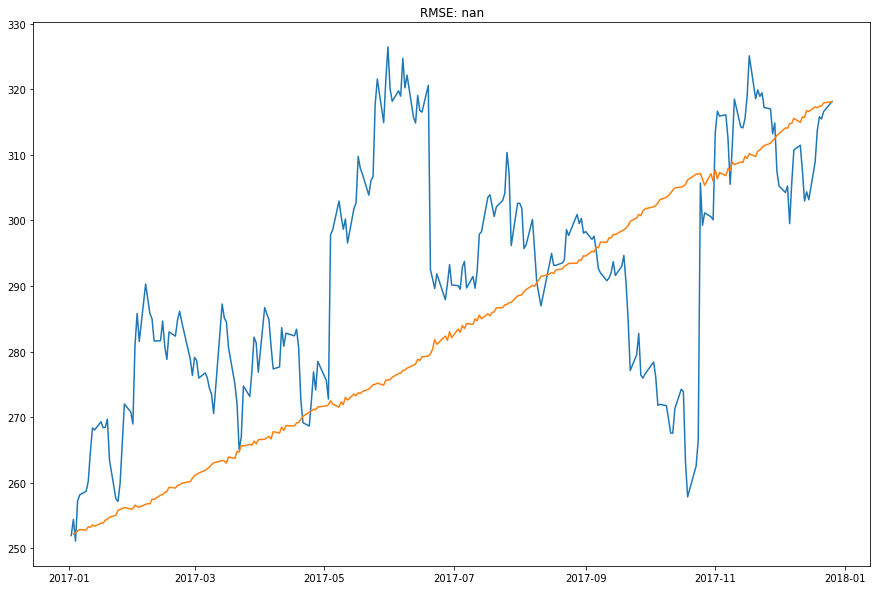

In [162]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
pyplot.plot(icici)
pyplot.plot(predictions_ARIMA)
pyplot.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-icici)**2)/len(icici)))
pyplot.show()